## Problem statement:
Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. The data below has the information about the factors that might have an impact on cardiovascular health. 


In [1]:
# import some usefull files.
import pandas as pd
import scipy as sc
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Task to be performed:
1.	Preliminary analysis:
a.	Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.

b.	Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy


In [2]:
health =pd.read_excel('1645792390_cep1_dataset.xlsx')
health.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
health.shape

(303, 14)

In [4]:
health.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
health.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# check the null values
health.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

we can see that there is no null values in the health data, lets proceed further.

In [8]:
#check for the datatypes.
health.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

In [10]:
# check for the dupicacy and unique value.
health.duplicated().sum()

1

In [11]:
health.nunique().sort_values(ascending=False)

chol        152
thalach      91
trestbps     49
age          41
oldpeak      40
ca            5
thal          4
cp            4
slope         3
restecg       3
target        2
exang         2
fbs           2
sex           2
dtype: int64

we can see that 1 duplicate vlaues.

lets find the values and drop it.

In [12]:
# check the duplicacy in rows 
duplicate_rows =health.duplicated()
duplicate_rows.value_counts()

False    302
True       1
dtype: int64

In [13]:
print(health[duplicate_rows])

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1  


In [14]:
#lets drop the duplicate rows.
health.shape

(303, 14)

In [15]:
health= health.drop_duplicates()
health.shape

(302, 14)

In [16]:
# verifiy the duplicated rows again
health.duplicated().sum()

0

# 2.	Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:

# a.	Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data


In [17]:
health.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [18]:
health.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# b.	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 

In [19]:
cat_column= health.select_dtypes(include="object").columns
cat_column

Index([], dtype='object')

we can see that there is no categorical variable.lets make the count.

<AxesSubplot:xlabel='sex', ylabel='count'>

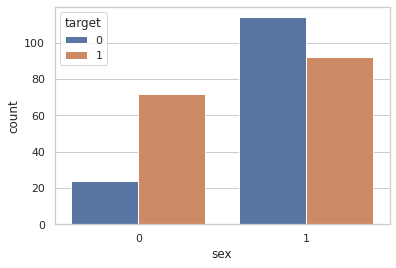

In [20]:
# lets make the count plot
sns.set_theme(style="whitegrid")
sns.countplot(data=health, x="sex", hue="target")

## c.	Study the occurrence of CVD across the Age category

In [21]:
health.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [22]:
# lets rename the dataset column
health =health.rename(columns={'cp':'Chest_Pain','trstbps':'Resting_Blood_Pressure','fbs':'Fasting_Blood_Sugar',
                               'restecg':'Electrocardiographic_result','thalach':'Max_Heart_Rate','exang':'Exercise_Induced_Angina'
                               ,'ca':'Number_Major_Vessel'}) 
health.columns

Index(['age', 'sex', 'Chest_Pain', 'trestbps', 'chol', 'Fasting_Blood_Sugar',
       'Electrocardiographic_result', 'Max_Heart_Rate',
       'Exercise_Induced_Angina', 'oldpeak', 'slope', 'Number_Major_Vessel',
       'thal', 'target'],
      dtype='object')

data here we have :
   
    cp|	Chest pain type.
    
    trestbps	Resting blood pressure (in mm Hg on admission to the hospital)

    chol	Serum cholesterol in mg/dl

    fbs	Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

    restecg	Resting electrocardiographic results

    thalach	Maximum heart rate achieved

    exang	Exercise induced angina (1 = yes; 0 = no)

    oldpeak	ST depression induced by exercise relative to rest

    slope	Slope of the peak exercise ST segment

    ca	Number of major vessels (0-3) colored by fluoroscopy

    thal	3 = normal; 6 = fixed defect; 7 = reversible defect

    Target	1 or 0


In [23]:
# study the CVD across the age :
disease= health
disease.head()

,age,sex,Chest_Pain,trestbps,chol,Fasting_Blood_Sugar,Electrocardiographic_result,Max_Heart_Rate,Exercise_Induced_Angina,oldpeak,slope,Number_Major_Vessel,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
 col=['target','oldpeak','thal']
disease =disease.drop(col, axis=1)


In [25]:
disease.head()


,age,sex,Chest_Pain,trestbps,chol,Fasting_Blood_Sugar,Electrocardiographic_result,Max_Heart_Rate,Exercise_Induced_Angina,slope,Number_Major_Vessel
0,63,1,3,145,233,1,0,150,0,0,0
1,37,1,2,130,250,0,1,187,0,0,0
2,41,0,1,130,204,0,0,172,0,2,0
3,56,1,1,120,236,0,1,178,0,2,0
4,57,0,0,120,354,0,1,163,1,2,0


In [26]:
disease.columns

Index(['age', 'sex', 'Chest_Pain', 'trestbps', 'chol', 'Fasting_Blood_Sugar',
       'Electrocardiographic_result', 'Max_Heart_Rate',
       'Exercise_Induced_Angina', 'slope', 'Number_Major_Vessel'],
      dtype='object')

Text(0.5, 1.0, 'The Occurrance of CVD across the Age')

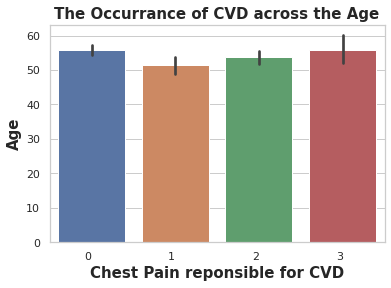

In [149]:


Chest_pain = sns.barplot(x=disease.Chest_Pain, y=disease.age )
Chest_pain.set_xticklabels(Chest_pain.get_xticklabels(), rotation=0, ha="right")
Chest_pain.set_xlabel('Chest Pain reponsible for CVD', weight='bold', size=15)
Chest_pain.set_ylabel('Age', weight='bold', size=15)
Chest_pain .set_title('The Occurrance of CVD across the Age', weight='bold', size=15)



Interpretation: the Chest pain generally occurs around the age of 50 and above that critically responsible for CVD.

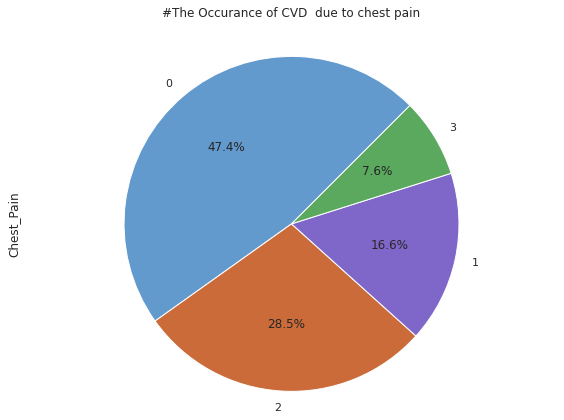

In [28]:

#  lets check fisrt the values counts of chest pain through out the data in percentage, before finding the occurance across the age.

colors = ['#639ace','#ca6b39','#7f67ca','#5ba85f','#c360aa','#a7993f','#cc566a']
health['Chest_Pain'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                         startangle=45, shadow=False, colors = colors,
                        figsize = (8,6))
plt.axis('equal')
plt.title('#The Occurance of CVD  due to chest pain\n')
plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'The Occurance of ChestPian for CVD  ')]

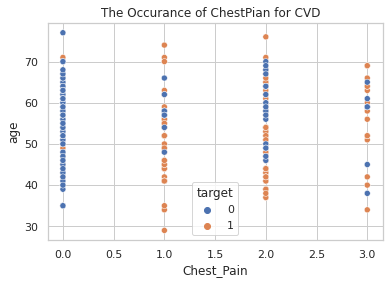

In [29]:
# lets find out the Chest Pain responsible in different age group for CVD.
sns.scatterplot(x=health['Chest_Pain'], y=health['age'], hue=health['target']).set(title='The Occurance of ChestPian for CVD  ')

In [30]:
disease.Chest_Pain.value_counts()

0    143
2     86
1     50
3     23
Name: Chest_Pain, dtype: int64

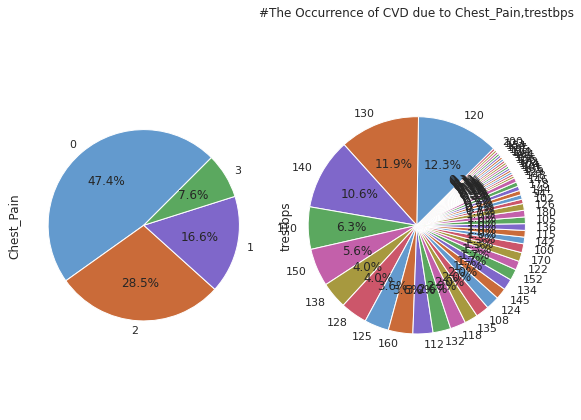

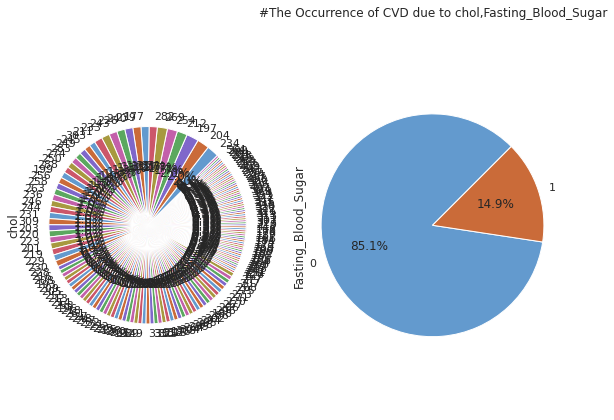

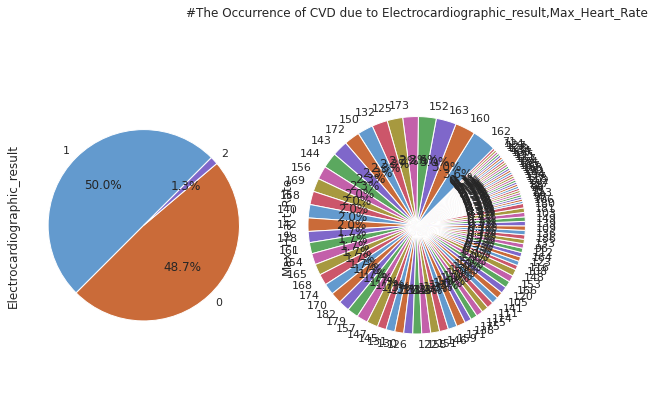

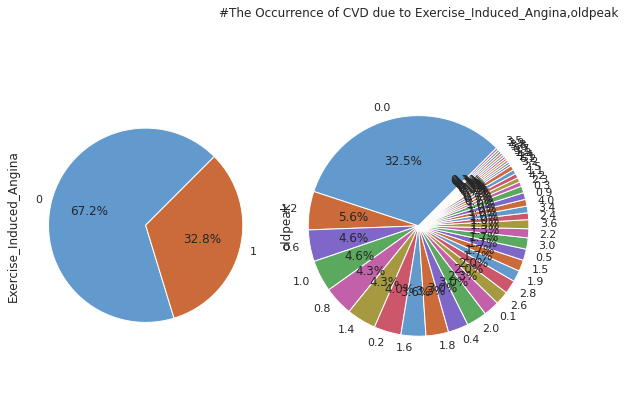

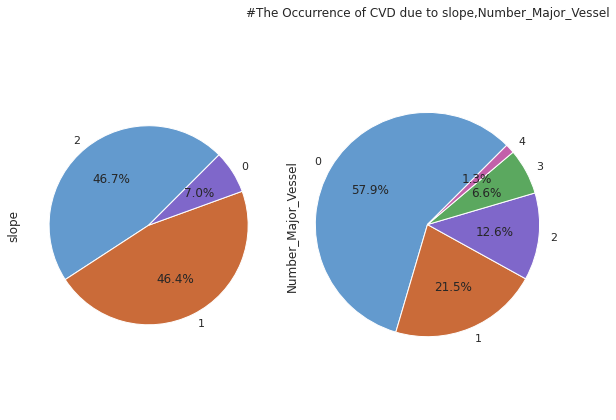

In [31]:
num_cols = ['Chest_Pain', 'trestbps', 'chol', 'Fasting_Blood_Sugar',
            'Electrocardiographic_result', 'Max_Heart_Rate',
            'Exercise_Induced_Angina', 'oldpeak', 'slope', 'Number_Major_Vessel']
colors = ['#639ace', '#ca6b39', '#7f67ca', '#5ba85f', '#c360aa', '#a7993f', '#cc566a']

for i in range(0, len(num_cols), 2):
    plt.figure(figsize=(10, 4))
    plt.subplot(121)
   
    health[num_cols[i]].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                            startangle=45, shadow=False, colors=colors,
                                            figsize=(8, 6))
    plt.subplot(122)
     
    health[num_cols[i + 1]].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                                startangle=45, shadow=False, colors=colors,
                                                figsize=(8, 6))
    plt.axis('equal')
    plt.title('#The Occurrence of CVD due to {},{}\n'.format(num_cols[i],num_cols[i + 1]))
    plt.tight_layout()
    plt.show()





we can see that some data is not clearly visible, lets try with the line pot.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


(26.6, 79.4, 88.7, 205.3)

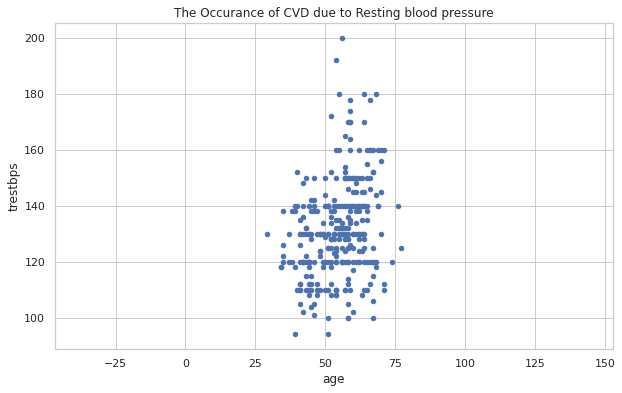

In [32]:
# lets find the occurance of cvs due to resting blood pressure across age
health[['age','trestbps']].plot(kind='scatter',x='age',y='trestbps',figsize=(10,6),title="The Occurance of CVD due to Resting blood pressure").axis('equal')
       
       
     

 Interpretation: we can see that age group between 30-70 has more bloodpressure report for CVD. 

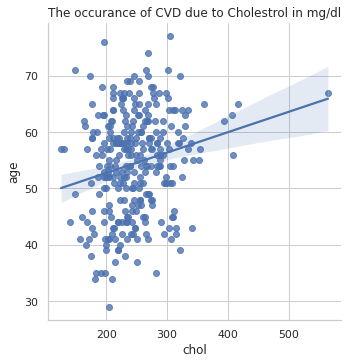

In [33]:
#lets find the CVD occurance across ages due to cholesterol
sns.lmplot('chol', 'age', data=health, fit_reg=True).set(title="The occurance of CVD due to Cholestrol in mg/dl")

Interpretation: we can see that age group between 50 and above  has more cholestrol report for CVD.

[Text(0.5, 1.0, 'The occurance of CVD due to Fasting blood sugar > 120 mg/dl ')]

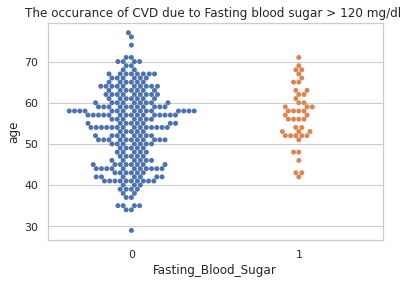

In [34]:
#lets find the CVD occurance across ages due to blood sugar
sns.swarmplot(x=health['Fasting_Blood_Sugar'],
              y=health['age']).set(title="The occurance of CVD due to Fasting blood sugar > 120 mg/dl ")

Interpretation: we can see that age group between 40-70 has more Blood Sugar report for CVD.

In [35]:
##lets find the CVD occurance across ages due to electrocardiographic result
crosstab = pd.crosstab(index=health["Electrocardiographic_result"], columns=health["age"])
crosstab

age,29,34,35,37,38,39,40,41,42,43,...,65,66,67,68,69,70,71,74,76,77
Electrocardiographic_result,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,0,0,1,1,4,2,3,...,6,4,5,2,2,2,1,1,0,1
1,0,1,3,2,2,3,2,6,6,5,...,2,3,4,2,1,2,2,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Text(0.5, 1.0, 'The occurance of CVD due to Resting electrocardiographic results')

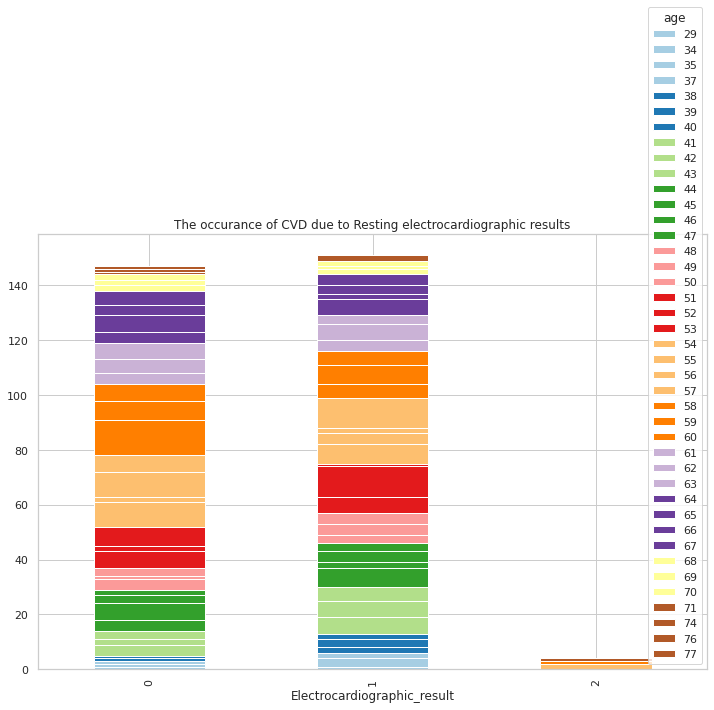

In [36]:
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')
plt.title("The occurance of CVD due to Resting electrocardiographic results")

Interpretation: we can see that age group between 50-70 has more Electrocardiographic report for CVD.

Text(0, 0.5, 'Maximum heart rate achieved')

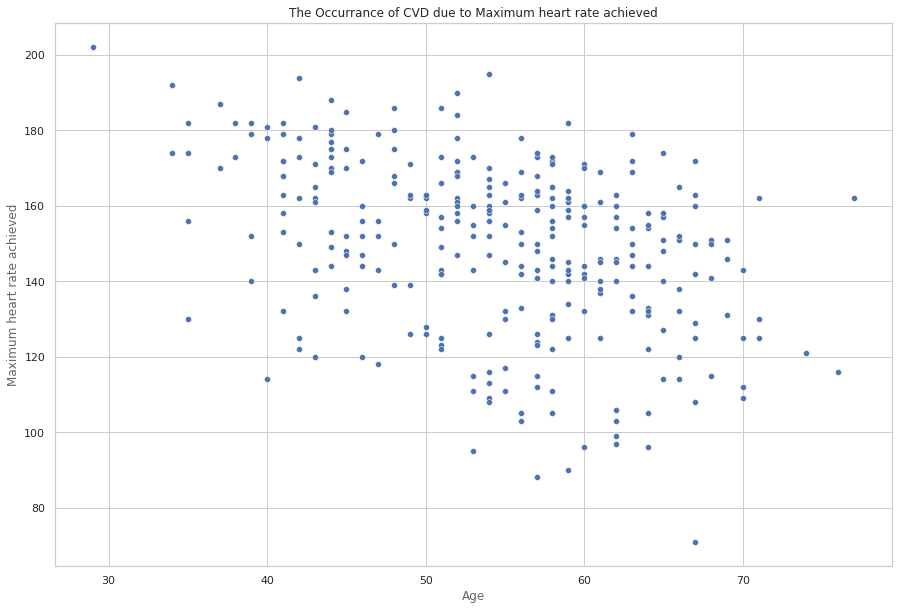

In [37]:
##lets find the CVD occurance across ages due to Maximum Heart Rate
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(15, 10))

sns.scatterplot(data=health, x="age", y="Max_Heart_Rate", legend=False, sizes=(20, 200), ax=ax)

ax.set_title('The Occurrance of CVD due to Maximum heart rate achieved')
ax.set_xlabel("Age", alpha=0.7)
ax.set_ylabel("Maximum heart rate achieved", alpha=0.7)
   



Interpretation: we can see that age group between 40-70 has more Maximum Heart Rate report for CVD.

Text(0.5, 1.0, 'The occurance of CVD due to  Exercise induced angina (1 = yes; 0 = no)')

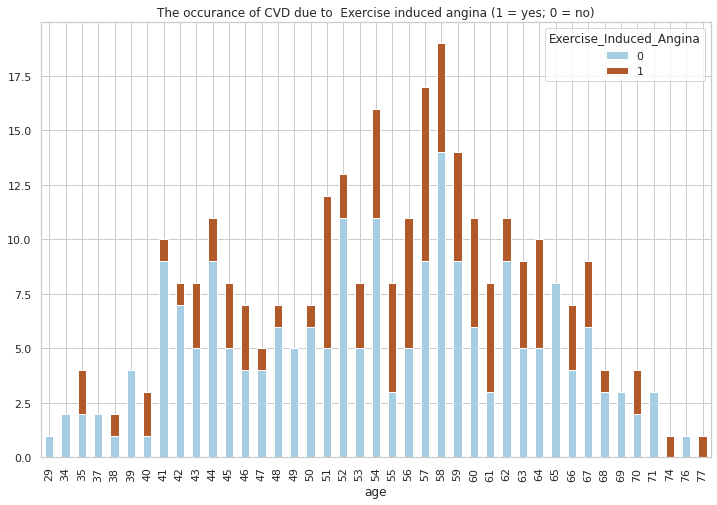

In [38]:
# #lets find the CVD occurance across ages due to Excersie induced Angina
       
crosstab =pd.crosstab(index=health['age'],columns=health['Exercise_Induced_Angina'])

crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')
plt.title("The occurance of CVD due to  Exercise induced angina (1 = yes; 0 = no)")
  



Interpretation: we can see that age group between 35-80 has more Exercise Induced Angina report for CVD.

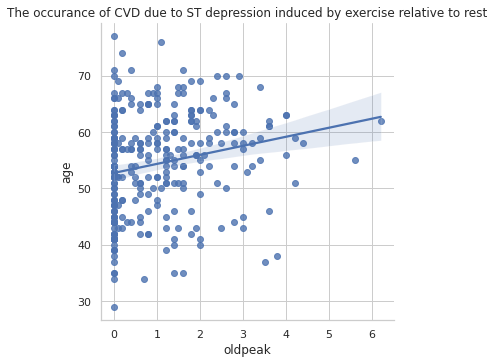

In [39]:
#lets find the CVD occurance across ages due to oldpeak

sns.lmplot('oldpeak','age',data=health,fit_reg=True).set(title="The occurance of CVD due to ST depression induced by exercise relative to rest")

Interpretation: we can see that age group between 35-70 has more oldpeak report for CVD.

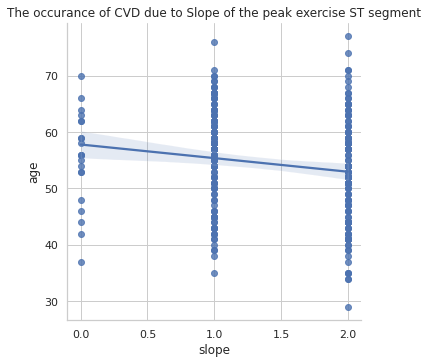

In [40]:
 #lets find the CVD occurance across ages due to slope
    
sns.lmplot('slope', 'age', data=health, fit_reg=True).set(title="The occurance of CVD due to Slope of the peak exercise ST segment")    



Interpretation: we can see that age group between 30-70 has more Exercise ST segment report for CVD.

Text(0.5, 1.0, 'The occurance of CVD due to Number of major vessels (0-3) colored by fluoroscopy')

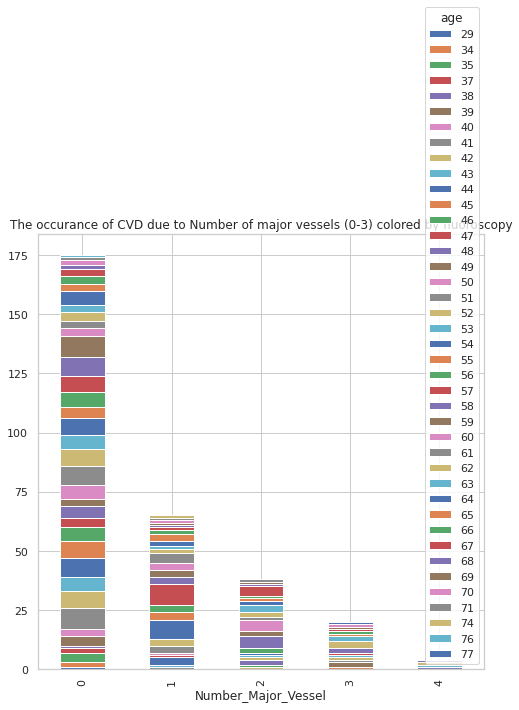

In [41]:
#lets find the CVD occurance across ages due to Number Major Vessel
crosstab= pd.crosstab(index=health['Number_Major_Vessel'],columns=health['age'])
crosstab.plot(kind= "bar",figsize=(8,8),stacked =True)  
plt.title("The occurance of CVD due to Number of major vessels (0-3) colored by fluoroscopy")
  




Interpretation: we can see that age group between 25-70 has more number of Major Vessel report for CVD.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'The occurance of CVD due to  thal')

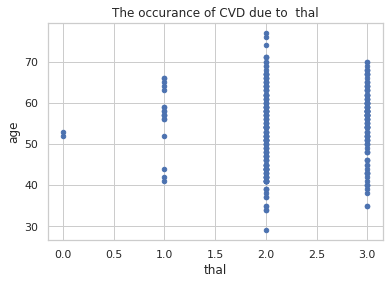

In [42]:
 #lets find the CVD occurance across ages due to thal
    
health.plot.scatter('thal','age')
plt.title("The occurance of CVD due to  thal")

Interpretation: we can see that age group between 30-70 has more thal report for CVD.

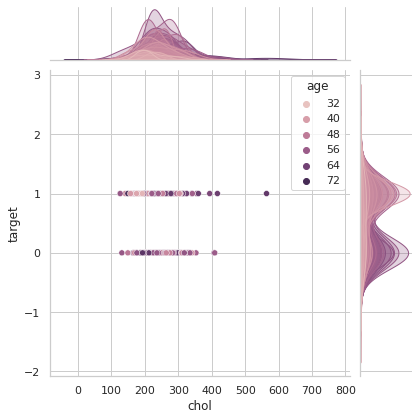

In [43]:
#lets find the CVD occurance across ages due to 'target'
sns.jointplot(data=health, x="chol", y="target", hue="age")

Interpretation:  Overall, we can see that age group between 35-70 has more occurance of CVD due to output result.

## d.	Study the composition of all patients with respect to the Sex category



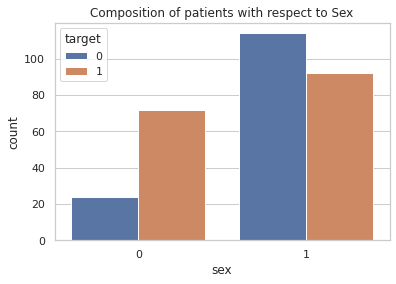

In [44]:
# lets plot the countplot for all patient (target) detects heart diseases again their gender(sex).
sns.countplot(data=health, x='sex', hue='target')
plt.title('Composition of patients with respect to Sex')
plt.show()

<AxesSubplot:xlabel='sex', ylabel='target'>

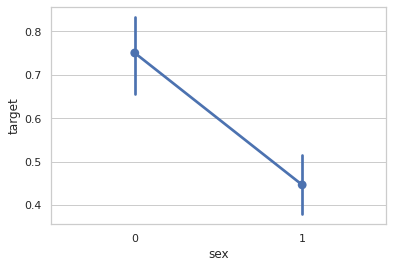

In [45]:
sns.pointplot(data=health, x='sex',y='target')

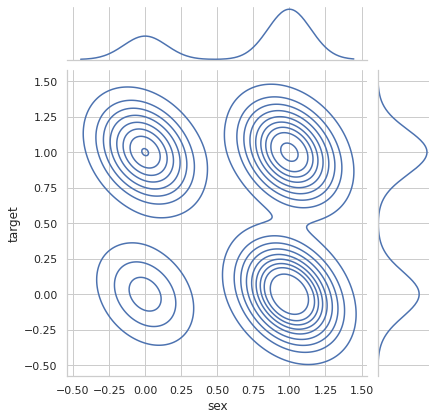

In [46]:
# make KDE plot for concentrated gender impact of heart disease
sns.jointplot(data=health, x="sex", y="target", kind="kde")

Interpretation: we can see that Male, has more diseases in the age (50-80) and Female ,has more heart diseases in the age  (35-60).  

In [47]:
# check the skewness of the data
health.skew()

age                           -0.203743
sex                           -0.786120
Chest_Pain                     0.493022
trestbps                       0.716541
chol                           1.147332
Fasting_Blood_Sugar            1.981201
Electrocardiographic_result    0.169467
Max_Heart_Rate                -0.532671
Exercise_Induced_Angina        0.737281
oldpeak                        1.266173
slope                         -0.503247
Number_Major_Vessel            1.295738
thal                          -0.481232
target                        -0.173691
dtype: float64

we can see that age,sex,Max_Heart_Rate,Slope,Thal,Target are negative Skew and rest are positive skewed.

### Study if one can detect heart attacks based on anomalies in the resting blood pressure(tretbps) of a patient.

<AxesSubplot:xlabel='target', ylabel='trestbps'>

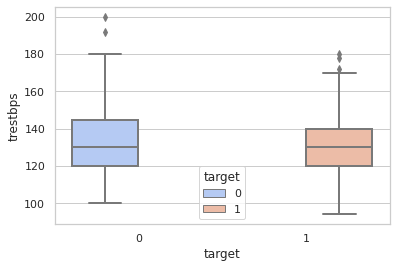

In [48]:

sns.boxplot(data=health, y='trestbps', x='target', hue='target', color='coolwarm', palette='coolwarm',
                saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=2, whis=1.5)

we can see there is an outliers lets find out which index row has an outliers in trestbps(Resting blood pressure (in mm Hg on admission to the hospital).

In [49]:
# lets find the number of outliers
def outliers(col):
    sorted(col)
    Q1,Q3 =np.percentile(col,[25,75])
    IQR =Q3-Q1
    lower_range =Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [50]:
# check for outliers in the column name= trestbps
lower_range,upper_range =outliers(health['trestbps'])
low_val =health[health['trestbps'].values<lower_range]
print(low_val)
print('--'*30)
up_val =health[health['trestbps'].values>upper_range]
print(up_val)
lower_outlier= low_val.value_counts().sum(axis=0)
upper_outlier =up_val.value_counts().sum(axis=0)
Total_outliers =lower_outlier+upper_outlier
print("Total Outliers in Resting blood pressure (in mm Hg on admission to the hospital)",Total_outliers)

low_ind =list(health[health['trestbps']<lower_range].index)
up_ind =list(health[health['trestbps']>upper_range].index)
total_ind= list(low_ind+up_ind)
print("Total index that has outliers",total_ind)

Empty DataFrame
Columns: [age, sex, Chest_Pain, trestbps, chol, Fasting_Blood_Sugar, Electrocardiographic_result, Max_Heart_Rate, Exercise_Induced_Angina, oldpeak, slope, Number_Major_Vessel, thal, target]
Index: []
------------------------------------------------------------
     age  sex  Chest_Pain  trestbps  chol  Fasting_Blood_Sugar  \
8     52    1           2       172   199                    1   
101   59    1           3       178   270                    0   
110   64    0           0       180   325                    0   
203   68    1           2       180   274                    1   
223   56    0           0       200   288                    1   
241   59    0           0       174   249                    0   
248   54    1           1       192   283                    0   
260   66    0           0       178   228                    1   
266   55    0           0       180   327                    0   

     Electrocardiographic_result  Max_Heart_Rate  Exercise_Ind

there are total 9 patient name list (rows) whose heart attack based on anomalies in the resting blood pressure.

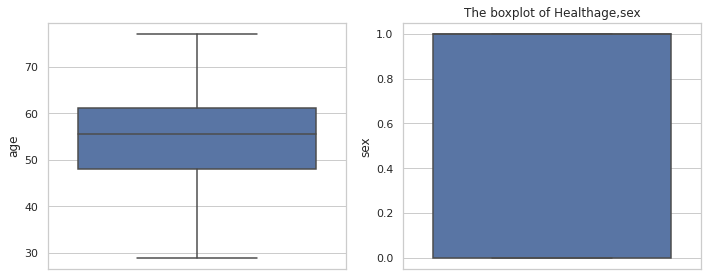

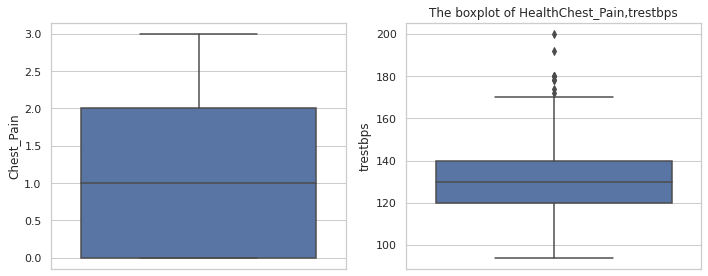

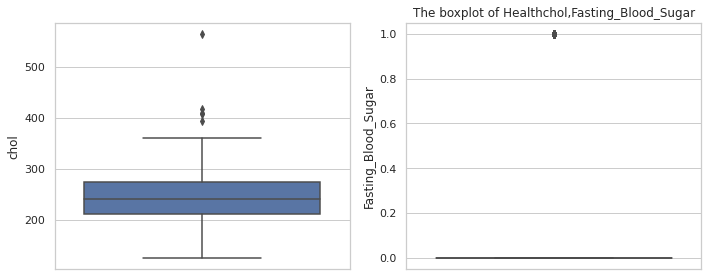

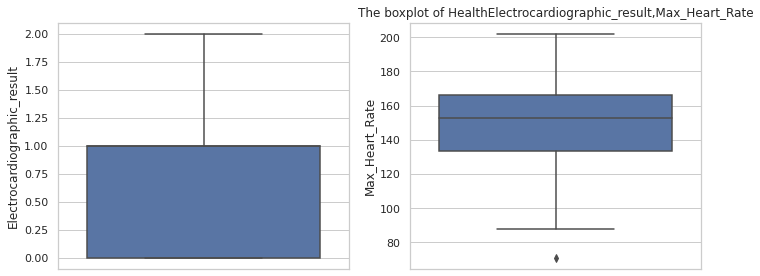

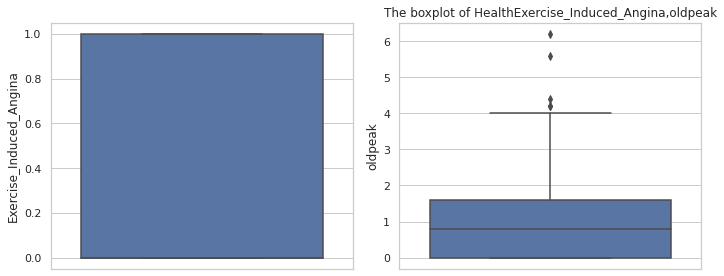

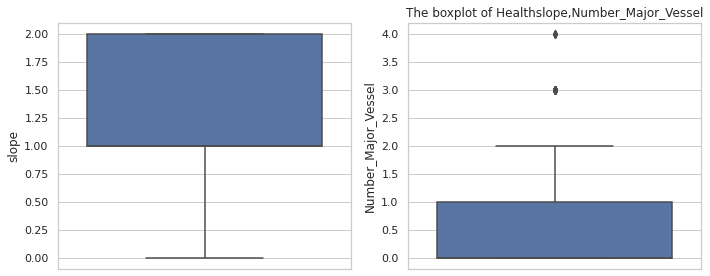

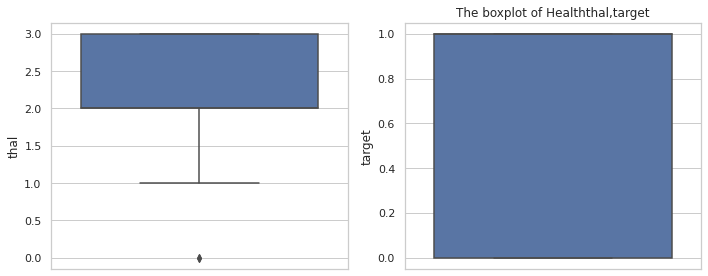

In [51]:
# lets check for other outliers as well with the help of  box plot.
num_cols =['age', 'sex', 'Chest_Pain', 'trestbps', 'chol', 'Fasting_Blood_Sugar',
       'Electrocardiographic_result', 'Max_Heart_Rate',
       'Exercise_Induced_Angina', 'oldpeak', 'slope', 'Number_Major_Vessel',
       'thal', 'target'];
facet= None

for i in range(0,len(num_cols),2):
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.boxplot(facet,num_cols[i],data=health)
    plt.subplot(122)
    sns.boxplot(facet,num_cols[i+1],data=health)
    plt.title("The boxplot of Health{},{}".format(num_cols[i],num_cols[i+1]))
    plt.tight_layout()
    plt.show()



# 	State what relationship exists between peak exercising and the occurrence of a heart attack


<AxesSubplot:xlabel='target', ylabel='Exercise_Induced_Angina'>

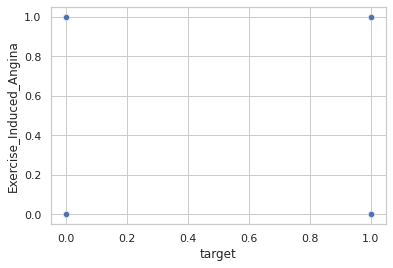

In [52]:
sns.scatterplot(data=health,y='Exercise_Induced_Angina',x='target')

Not clear with the above graphs let us try the boxplot.

<AxesSubplot:xlabel='target', ylabel='Exercise_Induced_Angina'>

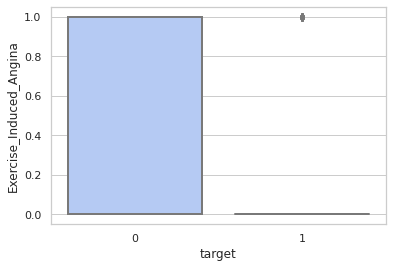

In [53]:
sns.boxplot(data=health, y='Exercise_Induced_Angina',x='target',color='coolwarm',palette='coolwarm',
            saturation=0.75,width=0.8,dodge=True,linewidth=2,fliersize=5,whis=1.5)

we can see their is an outlier, lets find out which are these outliers.

In [54]:
# lets find the number of outliers
def outliers(col):
    sorted(col)
    Q1,Q3 =np.percentile(col,[25,75])
    IQR =Q3-Q1
    lower_range =Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [55]:
# Check for Max_Heart_Rate
lower_range,upper_range =outliers(health['Exercise_Induced_Angina'])
low_val =health[health['Exercise_Induced_Angina'].values<lower_range]
print(low_val)

up_val =health[health['Exercise_Induced_Angina'].values>upper_range]
print(up_val)
lower_outlier= low_val.value_counts().sum(axis=0)
upper_outlier =up_val.value_counts().sum(axis=0)
Total_outliers =lower_outlier+upper_outlier
print("Total Outliers in Exercise_Induced_Angina",Total_outliers)

low_ind =list(health[health['Exercise_Induced_Angina']<lower_range].index)
up_ind =list(health[health['Exercise_Induced_Angina']>upper_range].index)
total_ind= list(low_ind+up_ind)
print("Total index that has outliers",total_ind)

Empty DataFrame
Columns: [age, sex, Chest_Pain, trestbps, chol, Fasting_Blood_Sugar, Electrocardiographic_result, Max_Heart_Rate, Exercise_Induced_Angina, oldpeak, slope, Number_Major_Vessel, thal, target]
Index: []
Empty DataFrame
Columns: [age, sex, Chest_Pain, trestbps, chol, Fasting_Blood_Sugar, Electrocardiographic_result, Max_Heart_Rate, Exercise_Induced_Angina, oldpeak, slope, Number_Major_Vessel, thal, target]
Index: []
Total Outliers in Exercise_Induced_Angina 0
Total index that has outliers []


#--> Interpretation: we can see that there are no outliers in the data.

# h.	Check if thalassemia is a major cause of CVD


In [56]:
health.thal.value_counts()

2    165
3    117
1     18
0      2
Name: thal, dtype: int64

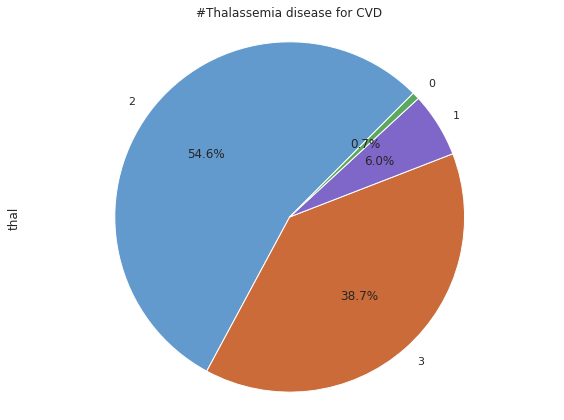

In [57]:
# lets count ht percentage of thal as disease
colors = ['#639ace','#ca6b39','#7f67ca','#5ba85f','#c360aa','#a7993f','#cc566a']
health['thal'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                         startangle=45, shadow=False, colors = colors,
                        figsize = (8,6))
plt.axis('equal')
plt.title('#Thalassemia disease for CVD ')
plt.tight_layout()
plt.show()

thalassemia is a major cause of CVD: we can see that:
 38.7% [3] = normal;
  6 = fixed defect; 
  6.0%[1], 7 = reversible defect,

<AxesSubplot:xlabel='thal', ylabel='count'>

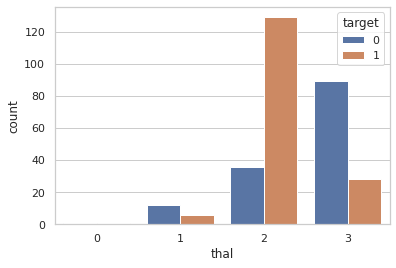

In [58]:
# Now lets plot a count plot for positive values.
sns.countplot(data=health, x='thal',hue='target')

we can verify with our data that thal with number_2 has most impact of Cardiovarscular Diseases value count of Thal 2- 165 which is equivelent of 54.6%

# List how many other factors determine the occurence of CVD.

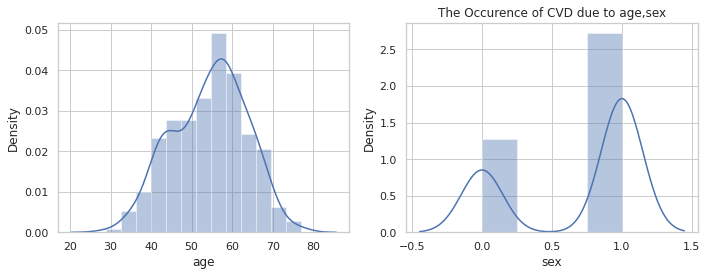

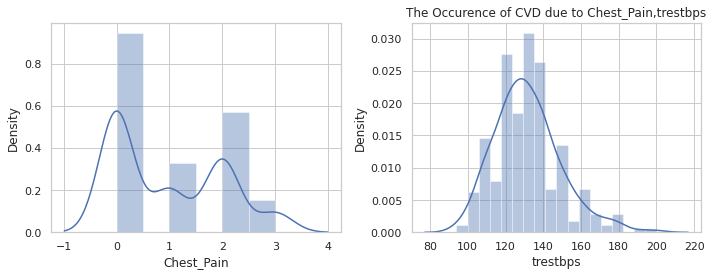

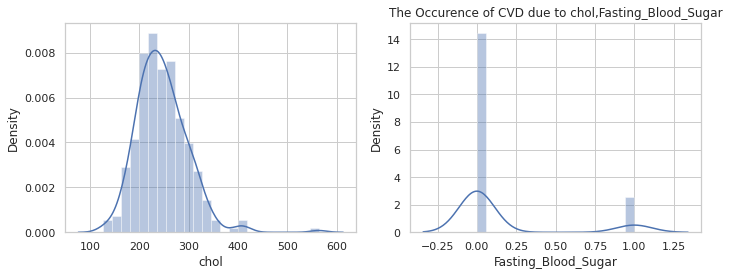

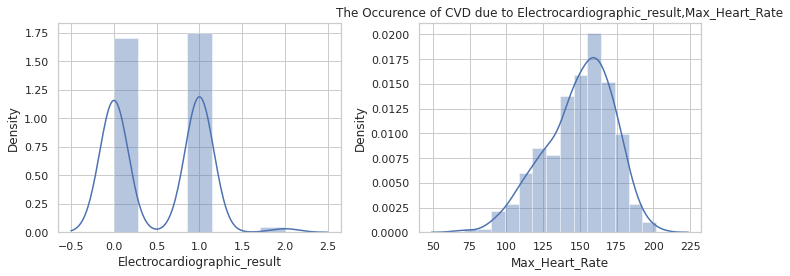

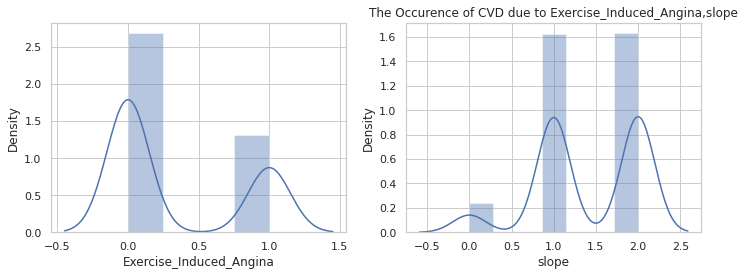

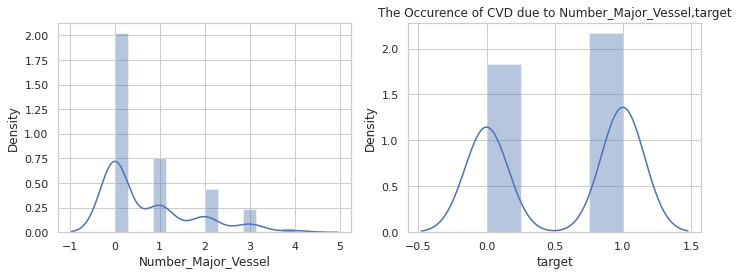

In [59]:
num_cols = ['age', 'sex', 'Chest_Pain', 'trestbps', 'chol', 'Fasting_Blood_Sugar',
       'Electrocardiographic_result', 'Max_Heart_Rate',
       'Exercise_Induced_Angina', 'slope', 'Number_Major_Vessel','target']



for i in range(0,len(num_cols),2):
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(health[num_cols[i]],hist= True,kde=True)
        plt.subplot(122)            
        sns.distplot(health[num_cols[i+1]],hist=True,kde=True)
        plt.title("The Occurence of CVD due to {},{}".format(num_cols[i],num_cols[i+1]))
        plt.tight_layout()
        plt.show()
        
        

# Use a Pairplot to understand the relationship between all the given variables.

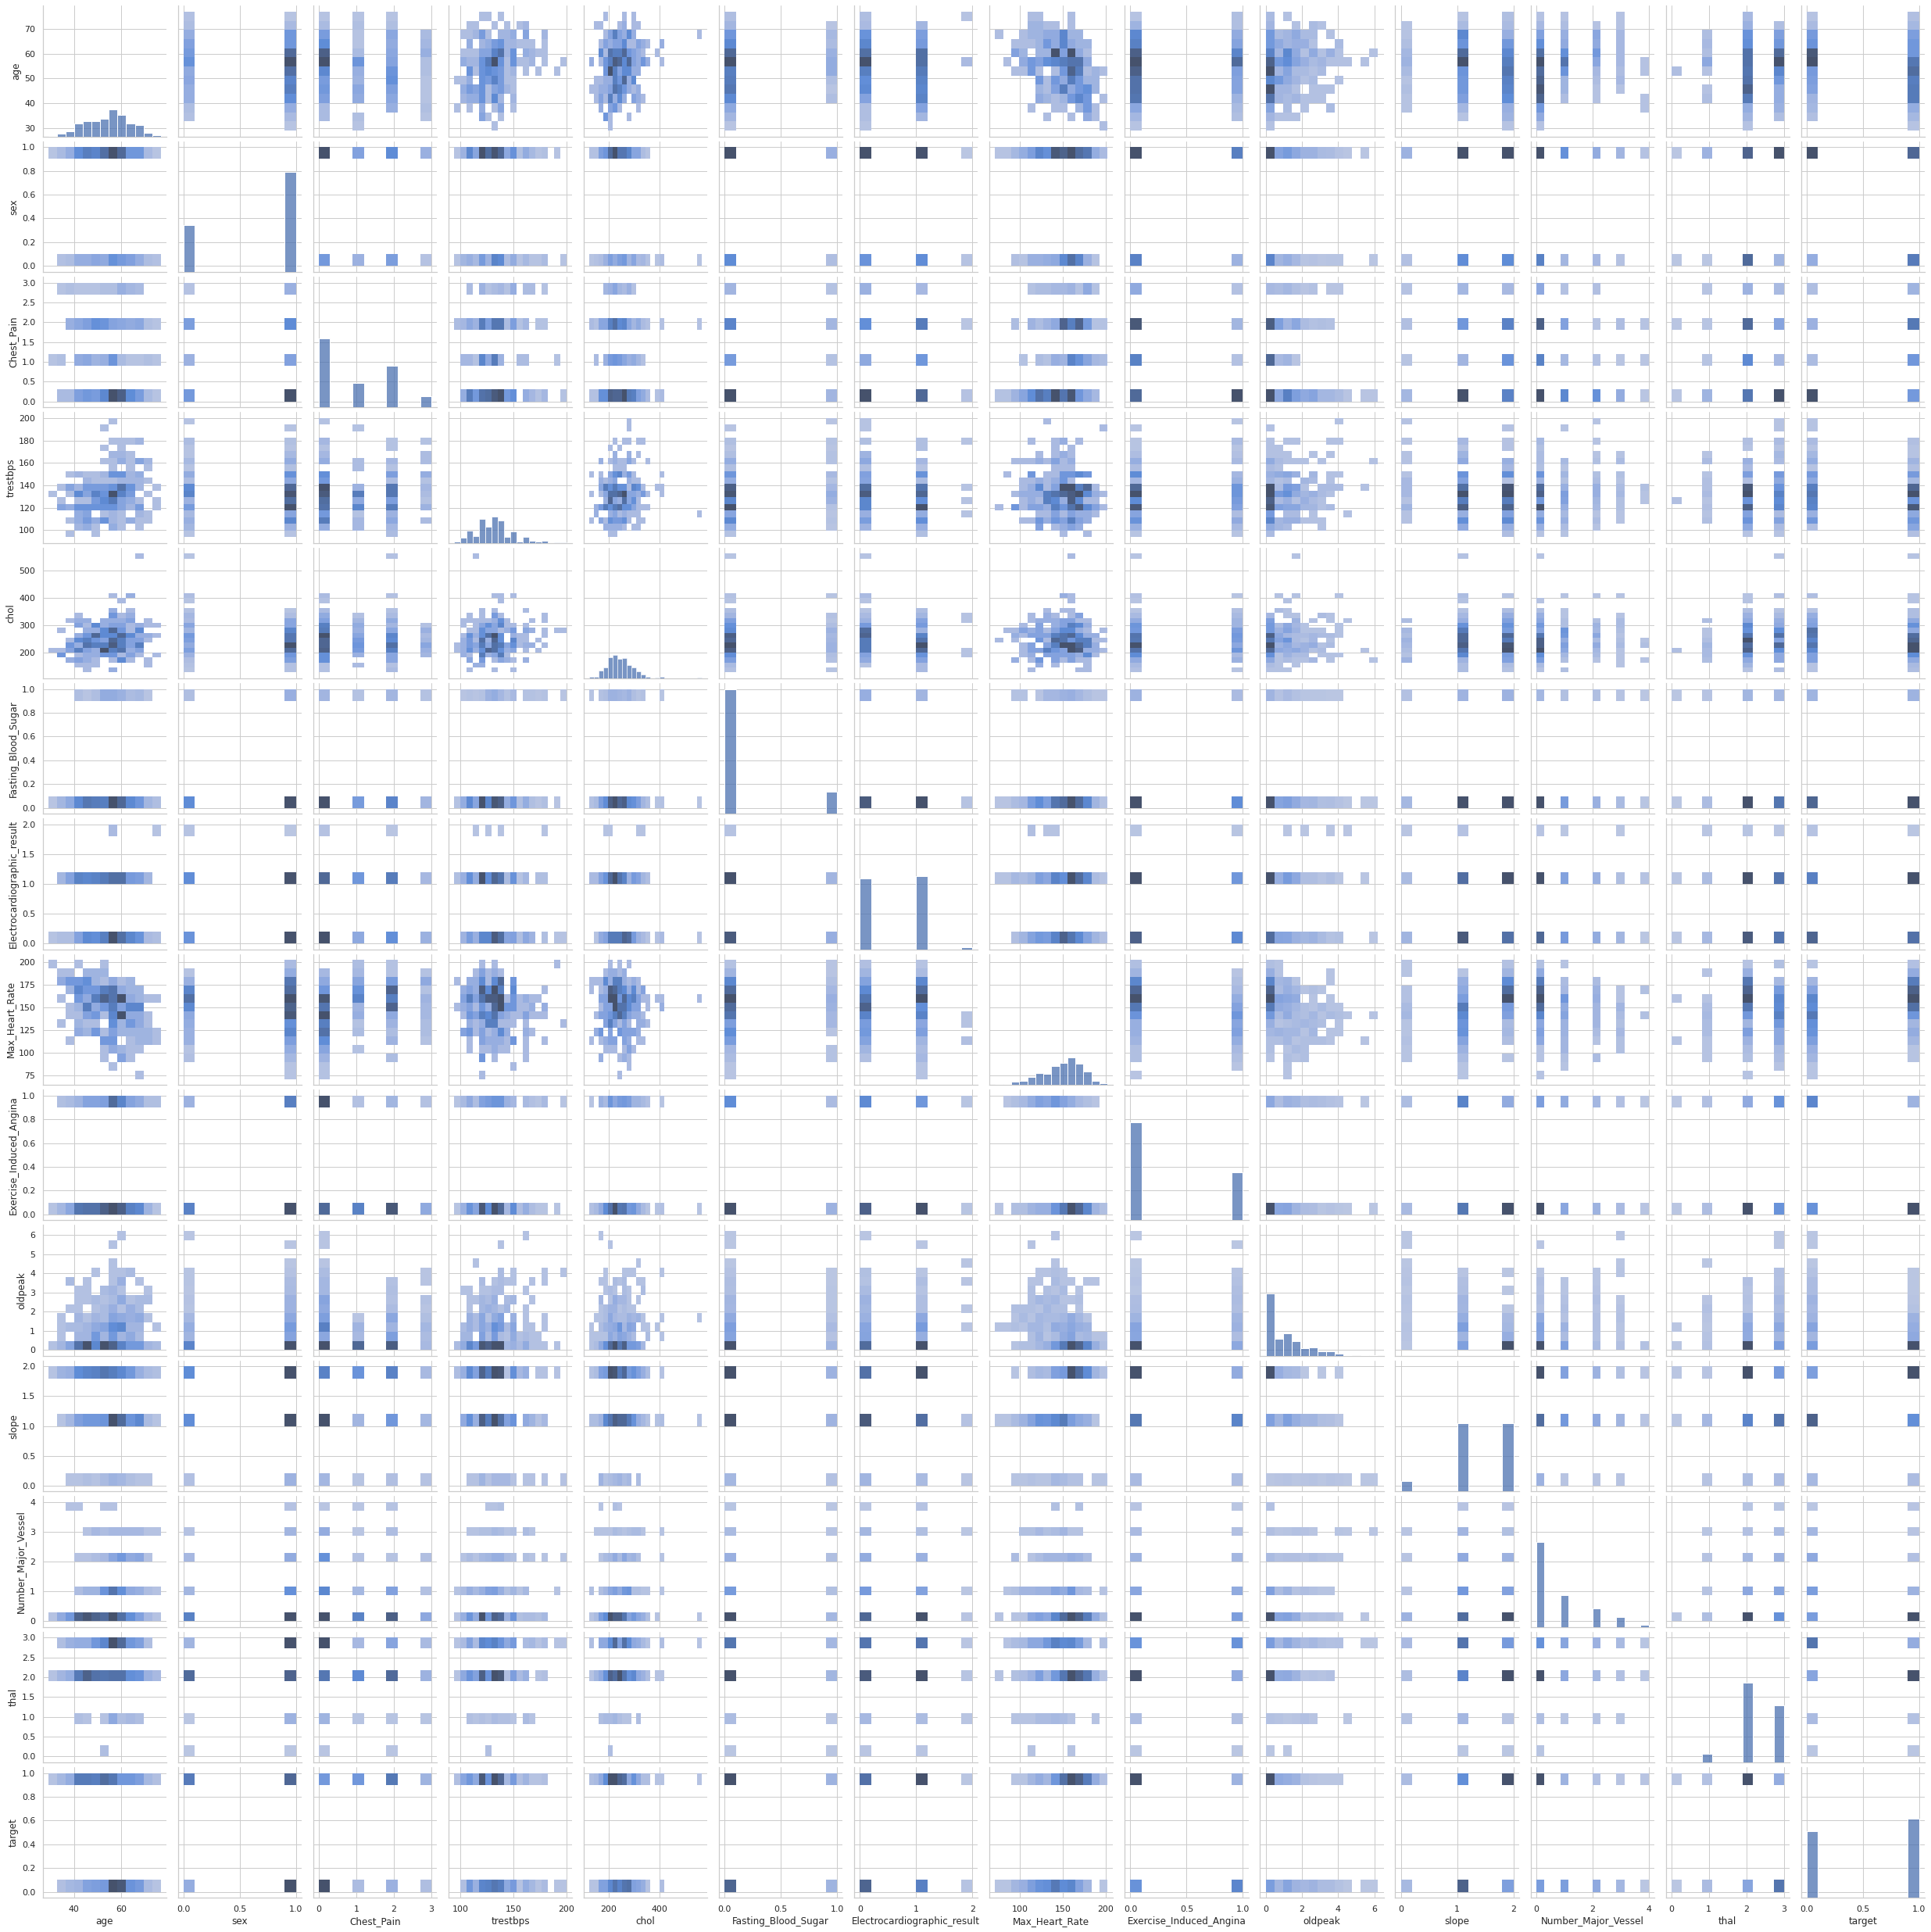

In [60]:
sns.pairplot(health,kind='hist')

# Lets check all outliers on by one.

In [61]:
# lets find the number of outliers
def outliers(col):
    sorted(col)
    Q1,Q3 =np.percentile(col,[25,75])
    IQR =Q3-Q1
    lower_range =Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [62]:
lower_range,upper_range =outliers(health['thal'])

In [63]:
low_val =health[health['thal'].values<lower_range]
low_val

,age,sex,Chest_Pain,trestbps,chol,Fasting_Blood_Sugar,Electrocardiographic_result,Max_Heart_Rate,Exercise_Induced_Angina,oldpeak,slope,Number_Major_Vessel,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [64]:
up_val =health[health['thal'].values>upper_range]
up_val

,age,sex,Chest_Pain,trestbps,chol,Fasting_Blood_Sugar,Electrocardiographic_result,Max_Heart_Rate,Exercise_Induced_Angina,oldpeak,slope,Number_Major_Vessel,thal,target


In [65]:
lower_outlier= low_val.value_counts().sum(axis=0)

In [66]:
upper_outlier =up_val.value_counts().sum(axis=0)

In [67]:
Total_outliers =lower_outlier+upper_outlier
Total_outliers

2

In [68]:
low_ind =list(health[health['thal']<lower_range].index)
up_ind =list(health[health['thal']>upper_range].index)
total_ind= list(low_ind+up_ind)
print(total_ind)

[48, 281]


In [69]:
# lets drop the outliers for better prediction and accuracy of the data
print("Shape Before Dropping Outlier Rows:", health.shape)

health.drop(total_ind, inplace = True)

print("Shape After Dropping Outlier Rows:", health.shape)

Shape Before Dropping Outlier Rows: (302, 14)
Shape After Dropping Outlier Rows: (300, 14)


In [70]:
# check for Number_ Major_Vessel
lower_range,upper_range =outliers(health['Number_Major_Vessel'])

low_val =health[health['Number_Major_Vessel'].values<lower_range]
print(low_val)
print('--'*30)

up_val =health[health['Number_Major_Vessel'].values>upper_range]
print(up_val)

lower_outlier= low_val.value_counts().sum(axis=0)
upper_outlier =up_val.value_counts().sum(axis=0)
Total_outliers =lower_outlier+upper_outlier
print("Total Outliers in Number of Major Vessels",Total_outliers)

low_ind =list(health[health['Number_Major_Vessel']<lower_range].index)
up_ind =list(health[health['Number_Major_Vessel']>upper_range].index)
total_ind= list(low_ind+up_ind)
print("Total index that has outliers",total_ind)

Empty DataFrame
Columns: [age, sex, Chest_Pain, trestbps, chol, Fasting_Blood_Sugar, Electrocardiographic_result, Max_Heart_Rate, Exercise_Induced_Angina, oldpeak, slope, Number_Major_Vessel, thal, target]
Index: []
------------------------------------------------------------
     age  sex  Chest_Pain  trestbps  chol  Fasting_Blood_Sugar  \
52    62    1           2       130   231                    0   
92    52    1           2       138   223                    0   
97    52    1           0       108   233                    1   
99    53    1           2       130   246                    1   
158   58    1           1       125   220                    0   
163   38    1           2       138   175                    0   
165   67    1           0       160   286                    0   
181   65    0           0       150   225                    0   
191   58    1           0       128   216                    0   
204   62    0           0       160   164                    0 

In [71]:
# lets drop the outliers for better prediction and accuracy of the data
print("Shape Before Dropping Outlier Rows:", health.shape)

health.drop(total_ind, inplace = True)

print("Shape After Dropping Outlier Rows:", health.shape)

Shape Before Dropping Outlier Rows: (300, 14)
Shape After Dropping Outlier Rows: (276, 14)


In [72]:
# check for oldpeak
lower_range,upper_range =outliers(health['oldpeak'])
low_val= health[health['oldpeak'].values<lower_range]
print(low_val)
print('-'*30)
up_val=health[health['oldpeak'].values>upper_range]
print(up_val)

lower_outlier= low_val.value_counts().sum(axis=0)
upper_outlier =up_val.value_counts().sum(axis=0)
Total_outliers =lower_outlier+upper_outlier
print("Total Outliers in oldpeak",Total_outliers)

low_ind =list(health[health['oldpeak']<lower_range].index)
up_ind =list(health[health['oldpeak']>upper_range].index)
total_ind= list(low_ind+up_ind)
print("Total index that has outliers",total_ind)

Empty DataFrame
Columns: [age, sex, Chest_Pain, trestbps, chol, Fasting_Blood_Sugar, Electrocardiographic_result, Max_Heart_Rate, Exercise_Induced_Angina, oldpeak, slope, Number_Major_Vessel, thal, target]
Index: []
------------------------------
     age  sex  Chest_Pain  trestbps  chol  Fasting_Blood_Sugar  \
101   59    1           3       178   270                    0   
221   55    1           0       140   217                    0   

     Electrocardiographic_result  Max_Heart_Rate  Exercise_Induced_Angina  \
101                            0             145                        0   
221                            1             111                        1   

     oldpeak  slope  Number_Major_Vessel  thal  target  
101      4.2      0                    0     3       1  
221      5.6      0                    0     3       0  
Total Outliers in oldpeak 2
Total index that has outliers [101, 221]


In [73]:
# lets drop the outliers for better prediction and accuracy of the data
print("Shape Before Dropping Outlier Rows:", health.shape)

health.drop(total_ind, inplace = True)

print("Shape After Dropping Outlier Rows:", health.shape)

Shape Before Dropping Outlier Rows: (276, 14)
Shape After Dropping Outlier Rows: (274, 14)


In [74]:
# check for chol
lower_range, upper_range =outliers(health['chol'])
low_val =health[health['chol'].values<lower_range]
print(low_val)
print('--'*30)
up_val =health[health['chol'].values>upper_range]
print(up_val)
lower_outlier= low_val.value_counts().sum(axis=0)
upper_outlier =up_val.value_counts().sum(axis=0)
Total_outliers =lower_outlier+upper_outlier
print("Total Outliers in chol",Total_outliers)

low_ind =list(health[health['chol']<lower_range].index)
up_ind =list(health[health['chol']>upper_range].index)
total_ind= list(low_ind+up_ind)
print("Total index that has outliers",total_ind)

Empty DataFrame
Columns: [age, sex, Chest_Pain, trestbps, chol, Fasting_Blood_Sugar, Electrocardiographic_result, Max_Heart_Rate, Exercise_Induced_Angina, oldpeak, slope, Number_Major_Vessel, thal, target]
Index: []
------------------------------------------------------------
     age  sex  Chest_Pain  trestbps  chol  Fasting_Blood_Sugar  \
28    65    0           2       140   417                    1   
85    67    0           2       115   564                    0   
96    62    0           0       140   394                    0   
246   56    0           0       134   409                    0   

     Electrocardiographic_result  Max_Heart_Rate  Exercise_Induced_Angina  \
28                             0             157                        0   
85                             0             160                        0   
96                             0             157                        0   
246                            0             150                        1   

     o

In [75]:
# lets drop the outliers for better prediction and accuracy of the data
print("Shape Before Dropping Outlier Rows:", health.shape)

health.drop(total_ind, inplace = True)

print("Shape After Dropping Outlier Rows:", health.shape)

Shape Before Dropping Outlier Rows: (274, 14)
Shape After Dropping Outlier Rows: (270, 14)


In [76]:
# check for Fasting_Blood_Sugar
lower_range,upper_range =outliers(health['Fasting_Blood_Sugar'])
low_val =health[health['Fasting_Blood_Sugar'].values<lower_range]
print(low_val)
print('--'*30)
up_val =health[health['Fasting_Blood_Sugar'].values>upper_range]
print(up_val)
lower_outlier= low_val.value_counts().sum(axis=0)
upper_outlier =up_val.value_counts().sum(axis=0)
Total_outliers =lower_outlier+upper_outlier
print("Total Outliers in Fasting_Blood_Sugar",Total_outliers)

low_ind =list(health[health['Fasting_Blood_Sugar']<lower_range].index)
up_ind =list(health[health['Fasting_Blood_Sugar']>upper_range].index)
total_ind= list(low_ind+up_ind)
print("Total index that has outliers",total_ind)

Empty DataFrame
Columns: [age, sex, Chest_Pain, trestbps, chol, Fasting_Blood_Sugar, Electrocardiographic_result, Max_Heart_Rate, Exercise_Induced_Angina, oldpeak, slope, Number_Major_Vessel, thal, target]
Index: []
------------------------------------------------------------
     age  sex  Chest_Pain  trestbps  chol  Fasting_Blood_Sugar  \
0     63    1           3       145   233                    1   
8     52    1           2       172   199                    1   
14    58    0           3       150   283                    1   
23    61    1           2       150   243                    1   
26    59    1           2       150   212                    1   
29    53    1           2       130   197                    1   
36    54    0           2       135   304                    1   
60    71    0           2       110   265                    1   
64    58    1           2       140   211                    1   
76    51    1           2       125   245                    1 

In [77]:
# lets drop the outliers for better prediction and accuracy of the data
print("Shape Before Dropping Outlier Rows:", health.shape)

health.drop(total_ind, inplace = True)

print("Shape After Dropping Outlier Rows:", health.shape)

Shape Before Dropping Outlier Rows: (270, 14)
Shape After Dropping Outlier Rows: (233, 14)


In [78]:
# Check for trestbps
lower_range,upper_range =outliers(health['trestbps'])
low_val =health[health['trestbps'].values<lower_range]
print(low_val)

up_val =health[health['trestbps'].values>upper_range]
print(up_val)
lower_outlier= low_val.value_counts().sum(axis=0)
upper_outlier =up_val.value_counts().sum(axis=0)
Total_outliers =lower_outlier+upper_outlier
print("Total Outliers in trestbps",Total_outliers)

low_ind =list(health[health['trestbps']<lower_range].index)
up_ind =list(health[health['trestbps']>upper_range].index)
total_ind= list(low_ind+up_ind)
print("Total index that has outliers",total_ind)

Empty DataFrame
Columns: [age, sex, Chest_Pain, trestbps, chol, Fasting_Blood_Sugar, Electrocardiographic_result, Max_Heart_Rate, Exercise_Induced_Angina, oldpeak, slope, Number_Major_Vessel, thal, target]
Index: []
     age  sex  Chest_Pain  trestbps  chol  Fasting_Blood_Sugar  \
110   64    0           0       180   325                    0   
241   59    0           0       174   249                    0   
248   54    1           1       192   283                    0   
266   55    0           0       180   327                    0   

     Electrocardiographic_result  Max_Heart_Rate  Exercise_Induced_Angina  \
110                            1             154                        1   
241                            1             143                        1   
248                            0             195                        0   
266                            2             117                        1   

     oldpeak  slope  Number_Major_Vessel  thal  target  
110      0

In [79]:
# lets drop the outliers for better prediction and accuracy of the data
print("Shape Before Dropping Outlier Rows:", health.shape)

health.drop(total_ind, inplace = True)

print("Shape After Dropping Outlier Rows:", health.shape)

Shape Before Dropping Outlier Rows: (233, 14)
Shape After Dropping Outlier Rows: (229, 14)


In [80]:
# Check for Max_Heart_Rate
lower_range,upper_range =outliers(health['Max_Heart_Rate'])
low_val =health[health['Max_Heart_Rate'].values<lower_range]
print(low_val)

up_val =health[health['Max_Heart_Rate'].values>upper_range]
print(up_val)
lower_outlier= low_val.value_counts().sum(axis=0)
upper_outlier =up_val.value_counts().sum(axis=0)
Total_outliers =lower_outlier+upper_outlier
print("Total Outliers in Max_Heart_Rate",Total_outliers)

low_ind =list(health[health['Max_Heart_Rate']<lower_range].index)
up_ind =list(health[health['Max_Heart_Rate']>upper_range].index)
total_ind= list(low_ind+up_ind)
print("Total index that has outliers",total_ind)

     age  sex  Chest_Pain  trestbps  chol  Fasting_Blood_Sugar  \
272   67    1           0       120   237                    0   

     Electrocardiographic_result  Max_Heart_Rate  Exercise_Induced_Angina  \
272                            1              71                        0   

     oldpeak  slope  Number_Major_Vessel  thal  target  
272      1.0      1                    0     2       0  
Empty DataFrame
Columns: [age, sex, Chest_Pain, trestbps, chol, Fasting_Blood_Sugar, Electrocardiographic_result, Max_Heart_Rate, Exercise_Induced_Angina, oldpeak, slope, Number_Major_Vessel, thal, target]
Index: []
Total Outliers in Max_Heart_Rate 1
Total index that has outliers [272]


In [81]:
# lets drop the outliers for better prediction and accuracy of the data
print("Shape Before Dropping Outlier Rows:", health.shape)

health.drop(total_ind, inplace = True)

print("Shape After Dropping Outlier Rows:", health.shape)

Shape Before Dropping Outlier Rows: (229, 14)
Shape After Dropping Outlier Rows: (228, 14)


In [82]:
correlation = health['chol'].corr(health['target'])
correlation

-0.0673214602790367

In [83]:
health.columns

Index(['age', 'sex', 'Chest_Pain', 'trestbps', 'chol', 'Fasting_Blood_Sugar',
       'Electrocardiographic_result', 'Max_Heart_Rate',
       'Exercise_Induced_Angina', 'oldpeak', 'slope', 'Number_Major_Vessel',
       'thal', 'target'],
      dtype='object')

# f.	Describe the relationship between cholesterol levels and a target variable


In [84]:
#lets find the correlation between cholestrol level, target varible by using correlation function.

In [85]:
corr_1 =health['chol'].corr(health['target'])
corr_1

-0.0673214602790367

In [86]:
corr=health[["chol","target"]].corr()
print(corr)

            chol    target
chol    1.000000 -0.067321
target -0.067321  1.000000


<AxesSubplot:xlabel='chol'>

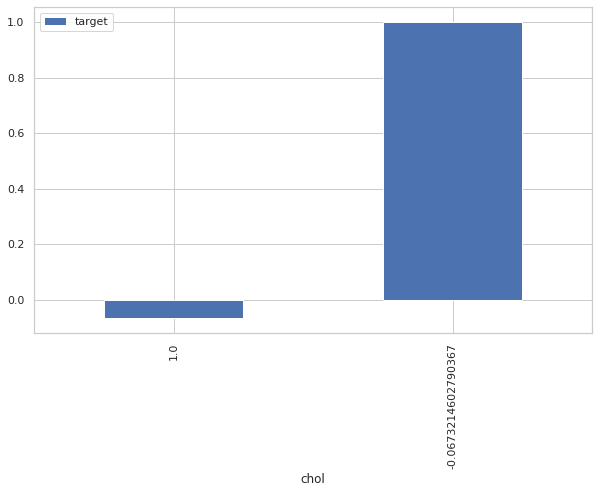

In [87]:
# lets plot the coorelation bar plot and heat map
corr.plot(kind='bar', x='chol',y='target',figsize=(10,6))


<AxesSubplot:>

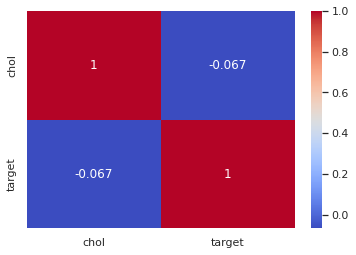

In [88]:
# lets plot the heat map
sns.heatmap(corr, annot =True,cmap='coolwarm')


interpretation: it has a correlation of 81% betwen the output target and cholestrol for the occurance of heart attack.

# More Accurate relationship between cholestral and target varial let us use auto correlation factors and plot the graph.

In [89]:
from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.api import qqplot
import statsmodels.api as sm
from scipy import stats
import statsmodels.tsa.api as tsa
import statsmodels.api as sm
from scipy import stats

In [90]:
crosstab =pd.crosstab(index=health['target'],columns=health['chol'] )
crosstab

chol,131,141,149,157,160,166,167,168,169,172,...,321,325,326,330,335,340,342,353,354,360
target,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,1,1,0,1,1,...,0,0,1,1,2,0,0,1,0,0
1,0,1,1,1,1,0,0,1,0,0,...,1,1,0,0,0,1,1,0,1,1


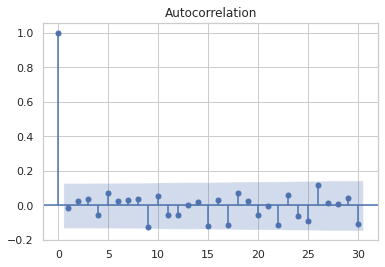

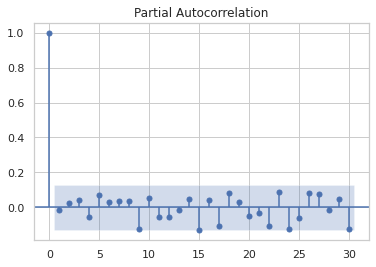

In [91]:
plot_acf(health.chol,lags=30)
plt.show()

plot_pacf(health.chol,lags=30)
plt.show()

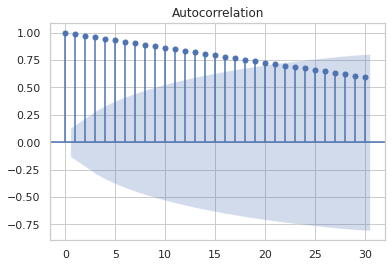

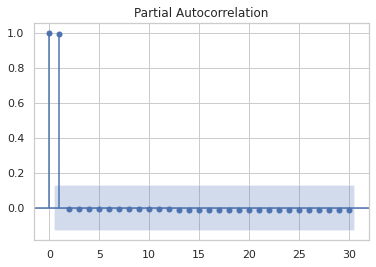

In [92]:
plot_acf(health.target,lags=30)
plt.show()

plot_pacf(health.target,lags=30)
plt.show()

We can see that ACF plot decreasing   exponentially and PACF plot has just the spike on lag 1. Hence, this is a ARMA(1,0) model.(AutoRegression Moving Average)

<AxesSubplot:>

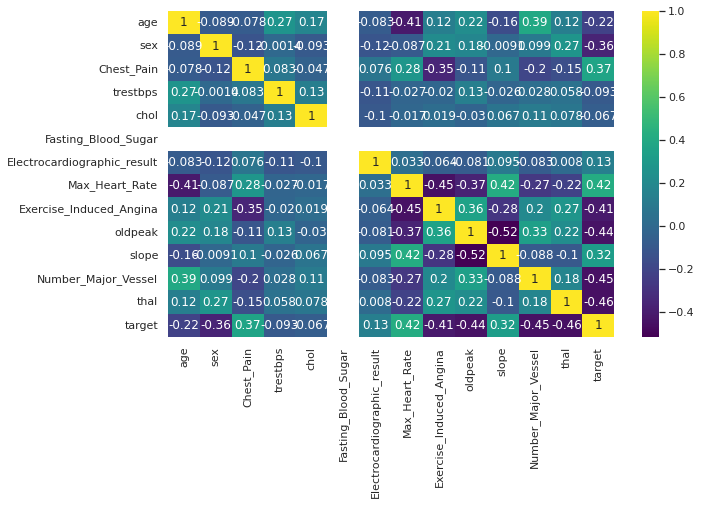

In [93]:
# lets plot heat map for entire health dataset
 #number of variables for heatmap
cols = health.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cols, annot=True, cmap = 'viridis')

# 3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection


In [102]:
# lets find the p value.
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols
from statsmodels.stats import weightstats as stests
from scipy import stats
import statsmodels.api as sm

In [103]:
health.columns

Index(['age', 'sex', 'Chest_Pain', 'trestbps', 'chol', 'Fasting_Blood_Sugar',
       'Electrocardiographic_result', 'Max_Heart_Rate',
       'Exercise_Induced_Angina', 'oldpeak', 'slope', 'Number_Major_Vessel',
       'thal', 'target'],
      dtype='object')

In [148]:

# Create the formula string
formula = "target ~ age + sex + Chest_Pain + trestbps + chol + Fasting_Blood_Sugar + Electrocardiographic_result + Max_Heart_Rate + Exercise_Induced_Angina + oldpeak + slope + Number_Major_Vessel + thal"

# Fit the OLS model
model = ols(formula, data=health).fit()

# Print the overall model statistics
print(f"Overall model F({model.df_model:.0f}, {model.df_resid:.0f}) = {model.fvalue:.3f}, p = {model.f_pvalue:.4f}")

# Perform ANOVA
res = sm.stats.anova_lm(model, typ=2)
print(res)

Overall model F(12, 215) = 21.058, p = 0.0000
                                sum_sq     df          F    PR(>F)
age                           0.068365    1.0   0.575286  0.448997
sex                           1.844672    1.0  15.522754  0.000110
Chest_Pain                    1.519225    1.0  12.784146  0.000432
trestbps                      0.244397    1.0   2.056580  0.153003
chol                          0.056249    1.0   0.473329  0.492201
Fasting_Blood_Sugar           1.126735    1.0   9.481373  0.002346
Electrocardiographic_result   0.072670    1.0   0.611512  0.435080
Max_Heart_Rate                0.399642    1.0   3.362950  0.068061
Exercise_Induced_Angina       0.162281    1.0   1.365581  0.243867
oldpeak                       0.328765    1.0   2.766530  0.097712
slope                         0.709848    1.0   5.973308  0.015330
Number_Major_Vessel           2.895271    1.0  24.363453  0.000002
thal                          2.826315    1.0  23.783189  0.000002
Residual        

Interpretation: we have seen that pvalue is 0 therefore there are correlation between the target variable nd dependent other variables. 


# lets use the Machine Learning Function for Predicting the Accuracy score.

In [142]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,mean_squared_error,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold


In [99]:
# lets split the data into trin and test set, eliminate the target column from x and put into y.
x_data= health.drop('target',axis=1)
y_data= health['target']

In [104]:
sc =StandardScaler()

In [106]:
x_data= sc.fit_transform(x_data)
x_data

array([[-1.77367443,  0.69319512,  1.03837841, ..., -2.47463235,
        -0.68550748, -0.56484923],
       [-1.33930518, -1.44259526,  0.05601211, ...,  0.93452883,
        -0.68550748, -0.56484923],
       [ 0.2895795 ,  0.69319512,  0.05601211, ...,  0.93452883,
        -0.68550748, -0.56484923],
       ...,
       [-0.90493593,  0.69319512,  2.0207447 , ..., -0.77005176,
        -0.68550748,  1.22384   ],
       [ 0.39817181,  0.69319512, -0.92635418, ..., -0.77005176,
         0.74839807,  1.22384   ],
       [ 0.39817181, -1.44259526,  0.05601211, ..., -0.77005176,
         0.74839807, -0.56484923]])

In [107]:
x_train,x_test,y_train,y_test =train_test_split(x_data,y_data,random_state=30,test_size=0.3)

In [108]:
print("the train set for x_data",x_train.shape)
print("the test set for x_data",x_test.shape)
print("the train set for y_data",y_train.shape)
print("the test set for y_data",y_test.shape)

the train set for x_data (159, 13)
the test set for x_data (69, 13)
the train set for y_data (159,)
the test set for y_data (69,)


# find the model prediction using RandomForest Classifier

In [112]:
#lets use GridSearchCv for best estimator prediction.
RFC= RandomForestClassifier(random_state=30)
parm={'n_estimators':[10,15,25,100], 'max_depth':[3,5,7,10]}
grid= zip([RFC],[parm])
best= None

for i,j in grid:
    a= GridSearchCV(i,param_grid=j,cv=3, n_jobs=1)
    a.fit(x_train,y_train)
    if best is None:
        best=a
print("Best CV score",best.best_score_)
print("Model Parameter",best.best_params_)
print("Best Estimator",best.best_estimator_)




Best CV score 0.8742138364779874
Model Parameter {'max_depth': 3, 'n_estimators': 100}
Best Estimator RandomForestClassifier(max_depth=3, random_state=30)


In [114]:
rfc = best.best_estimator_
Model =rfc.fit(x_train,y_train)
Model

RandomForestClassifier(max_depth=3, random_state=30)

In [118]:
y_pred =rfc.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0])

In [143]:
# Using the cross validation value to predict the score.
seed=7
kfold=KFold(n_splits=5,random_state=7,shuffle=True)
print(cross_val_score(rfc,x_data,y_data,cv=kfold,scoring='accuracy'))
result=cross_val_score(rfc,x_data,y_data,cv=kfold,scoring='accuracy')
print(result*100)

[0.7826087  0.86956522 0.80434783 0.82222222 0.82222222]
[78.26086957 86.95652174 80.43478261 82.22222222 82.22222222]


In [119]:
#Check the Accuracy score and confussion matrix

print("The Accuracy Score by Using Random Forest Classifier",accuracy_score(y_test,y_pred))

The Accuracy Score by Using Random Forest Classifier 0.7536231884057971


In [122]:
Confusion_Matrix =confusion_matrix(y_pred,y_test)
Confusion_Matrix

array([[16,  6],
       [11, 36]])

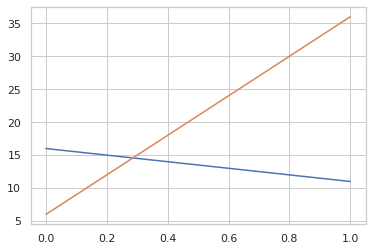

In [123]:
# plot the graph for confusion matrix
plt.plot(Confusion_Matrix)

In [124]:
# lets calculate the precision score, f1 score.


print("The Precision Score by Using Random Forest Classifier",precision_score(y_test,y_pred))
print()
print("The F1 Score by Using Random Forest Classifier",f1_score(y_test,y_pred))

The Precision Score by Using Random Forest Classifier 0.7659574468085106

The F1 Score by Using Random Forest Classifier 0.8089887640449439


In [128]:
# lets calulate the accuracy score by using logistic regression 
lr =LogisticRegression(random_state=30)
lr

LogisticRegression(random_state=30)

In [129]:
lr.fit(x_train,y_train)

LogisticRegression(random_state=30)

In [131]:
y_pred_1 =lr.predict(x_test)
y_pred_1

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0])

In [133]:
#Check the Accuracy score and confussion matrix

print("The Accuracy Score by Using Logistic Regression",accuracy_score(y_test,y_pred_1))

The Accuracy Score by Using Logistic Regression 0.782608695652174


In [134]:
# lets calculate the precision score, f1 score.


print("The Precision Score by Using Logistic Regression",precision_score(y_test,y_pred_1))
print()
print("The F1 Score by Using Logistic Regression",f1_score(y_test,y_pred_1))

The Precision Score by Using Logistic Regression 0.813953488372093

The F1 Score by Using Logistic Regression 0.8235294117647058


In [136]:
Confusion_Matrix_lr =confusion_matrix(y_test,y_pred_1)
Confusion_Matrix_lr

array([[19,  8],
       [ 7, 35]])

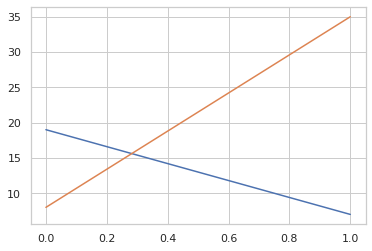

In [137]:
plt.plot(Confusion_Matrix_lr)

In [139]:
print("the mean squared error",mean_squared_error(y_test,y_pred_1))

the mean squared error 0.21739130434782608


In [140]:
print("the r2 score",r2_score(y_test,y_pred_1))

the r2 score 0.08730158730158732


# Conclusion: 
hence, by using Logistic Regression the accuracy score for having CardioVascular diseases denpending on the fators like Thalseminia, BloodSugar, ECG
,gender and age is 78% 
where as by using random forest classifier and GridSearch CV we have noticed the accuracy percentage is 75% 